* In this notebook, we'll scrape the novel Moby Dick from the website Project Gutenberg (which contains a large corpus of books) using the Python package requests. Then we'll extract words from this web data using BeautifulSoup. Finally, we'll dive into analyzing the distribution of words using the Natural Language ToolKit (nltk) and Counter.
* To analyze Moby Dick, we need to get the contents of Moby Dick from somewhere. Luckily, the text is freely available online at Project Gutenberg as an HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=4917dc6e1facd64a18db767ad144e20ade2c7690cdedb27a28a600a383d00285
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


#1. Tools for text processing

In [3]:
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter

#2. Request Moby Dick

In [4]:
req = requests.get('https://www.gutenberg.org/files/2701/2701-h/2701-h.htm')

In [5]:
req.encoding = 'utf-8'
html = req.text
print(html[0:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville</title>

<style type="text/css" xml:space="preserve">

    body {margin-left:15%; margin-right:15%; text-align:justify }
    p { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    pre       

#3. Get the text from the HTML

In [6]:
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text()
print(text[5000:10000])

equeg in His Coffin. 


 CHAPTER 111. The Pacific. 


 CHAPTER 112. The Blacksmith. 


 CHAPTER 113. The Forge. 


 CHAPTER 114. The Gilder. 


 CHAPTER 115. The Pequod Meets The Bachelor.
        


 CHAPTER 116. The Dying Whale. 


 CHAPTER 117. The Whale Watch. 


 CHAPTER 118. The Quadrant. 


 CHAPTER 119. The Candles. 


 CHAPTER 120. The Deck Towards the End of the
        First Night Watch. 


 CHAPTER 121. Midnight.—The Forecastle
        Bulwarks. 


 CHAPTER 122. Midnight Aloft.—Thunder and
        Lightning. 


 CHAPTER 123. The Musket. 


 CHAPTER 124. The Needle. 


 CHAPTER 125. The Log and Line. 


 CHAPTER 126. The Life-Buoy. 


 CHAPTER 127. The Deck. 


 CHAPTER 128. The Pequod Meets The Rachel. 


 CHAPTER 129. The Cabin. 


 CHAPTER 130. The Hat. 


 CHAPTER 131. The Pequod Meets The Delight. 


 CHAPTER 132. The Symphony. 


 CHAPTER 133. The Chase—First Day. 


 CHAPTER 134. The Chase—Second Day. 


 CHAPTER 135. The Chase.—Third Day. 


 Epilogue 



 




     

#4. Extract the words

In [14]:
from nltk.tokenize import RegexpTokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
token = tokenizer.tokenize(text)
token[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Moby',
 'Dick',
 'Or',
 'the',
 'Whale']

#5. Make the words lowercase

In [15]:
word_lower = [i.lower() for i in token]
word_lower[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'moby',
 'dick',
 'or',
 'the',
 'whale']

#6. Load in stop words

In [18]:
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

sw[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#7. Remove stop words in Moby Dick

In [20]:
word_nsw = [i for i in word_lower if i not in sw]

word_nsw[:10]

['project',
 'gutenberg',
 'ebook',
 'moby',
 'dick',
 'whale',
 'herman',
 'melville',
 'project',
 'gutenberg']

#8. We have the answer

In [21]:
count = Counter(word_nsw)
top = count.most_common(10)
print(top)

[('whale', 1244), ('one', 925), ('like', 647), ('upon', 568), ('man', 527), ('ship', 519), ('ahab', 517), ('ye', 473), ('sea', 455), ('old', 452)]


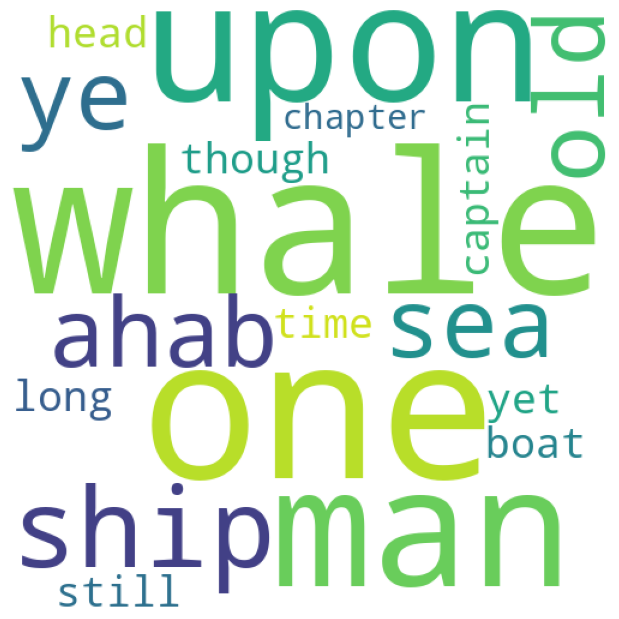

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

top_words = count.most_common(20)
top_20 = []
i = 0

while i < len(top_words):
  top_20.append(top_words[i][0])
  i += 1

string = " ".join(top_20)

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(string)

# plot the WordCloud image
plt.figure(figsize = (6, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

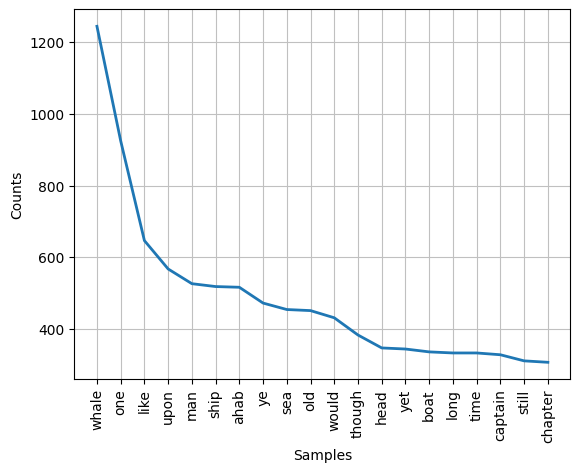

<Axes: xlabel='Samples', ylabel='Counts'>

In [28]:
%matplotlib inline

freqdist = nltk.FreqDist(word_nsw)

freqdist.plot(20)